## Resolver problema con gurobi

In [1]:
# Importar librerías de gurobi
import gurobipy as gp
from gurobipy import GRB

In [2]:
# Crear el modelo
m = gp.Model("LP_clase4")

# Crear variables
x1 = m.addVar(lb=0.0, ub = 1e6, name="x1") # Límite superior muy grande
x2 = m.addVar(lb=0.0, ub = 1e6, name="x2")
m.update()

# Crear restricciones
restriccion1 = m.addConstr(   x1 + 2*x2 <= 7,  name = "c1")
restriccion2 = m.addConstr(-2*x1 -   x2 <= 5,  name = "c2")
restriccion3 = m.addConstr( 5*x1 + 2*x2 <= 16, name = "c3")

# Crear función objetivo
m.setObjective(4*x1 + 3*x2, GRB.MAXIMIZE)

# Optimizar modelo
m.optimize()

Set parameter Username
Set parameter LicenseID to value 2596460
Academic license - for non-commercial use only - expires 2025-12-06
Gurobi Optimizer version 12.0.3 build v12.0.3rc0 (win64 - Windows 11.0 (26100.2))

CPU model: Intel(R) Core(TM) Ultra 7 155H, instruction set [SSE2|AVX|AVX2]
Thread count: 16 physical cores, 22 logical processors, using up to 22 threads

Optimize a model with 3 rows, 2 columns and 6 nonzeros
Model fingerprint: 0xfe116298
Coefficient statistics:
  Matrix range     [1e+00, 5e+00]
  Objective range  [3e+00, 4e+00]
  Bounds range     [1e+06, 1e+06]
  RHS range        [5e+00, 2e+01]
Presolve removed 1 rows and 0 columns
Presolve time: 0.01s
Presolved: 2 rows, 2 columns, 4 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    2.8000000e+01   6.170800e+00   0.000000e+00      0s
       2    1.6125000e+01   0.000000e+00   0.000000e+00      0s

Solved in 2 iterations and 0.01 seconds (0.00 work units)
Optimal objective  1.612500000e+0

In [3]:
# Imprimir resultados
print(f"\nObj: {m.ObjVal}")
print(f"x1: {x1.X}")
print(f"x2: {x2.X}")


Obj: 16.125
x1: 2.25
x2: 2.375


## Encontrar todas las soluciones básicas factibles

In [4]:
# Importar librerías para matemáticas y combinatoria
import numpy as np
from itertools import combinations

In [ ]:
# Matriz de restricciones
A = np.array([[ 1.0,  2.0, 1.0, 0.0, 0.0],
              [-2.0, -1.0, 0.0, 1.0, 0.0],
              [ 5.0,  2.0, 0.0, 0.0, 1.0],])
m, n = A.shape # m: restricciones, n: variables

# Vector del lado derecho
b = np.array([7.0, 5.0, 16.0])

# Función objetivo
c = np.array([4.0, 3.0, 0.0, 0.0, 0.0])

# Enumerar combinaciones de variables básicas
variables_idx = range(n)
BFS_posibles = list(combinations(variables_idx, m))

BFS = []
for sol_idx in BFS_posibles:
    B  = A[:, sol_idx]         # Extraigo solo las columnas de las variables básicas
    xB = np.linalg.solve(B, b) # Resuelvo el sistema de ecuaciones 
                               # para las variables básicas
    # Si la solución es positiva, entonces es una BFS
    if np.all(xB >= 0):        
        x_full  = np.zeros(5)
        x_full[list(sol_idx)] = xB
        BFS.append(x_full) # La añado a la lista de BFS

BFS = np.array(BFS)

print(f"Número de BFS: {BFS.shape[0]}")
print(BFS)

# Evaluar función objetivo
valores_obj = BFS @ c

ix_opt  = np.argmax(valores_obj)
max_opt = valores_obj[ix_opt]

print(f"\nValor óptimo: {max_opt}")
print(f"Solución óptima encontrada: {BFS[ix_opt]}")


Número de BFS: 4
[[ 2.25   2.375  0.    11.875  0.   ]
 [ 3.2    0.     3.8   11.4    0.   ]
 [ 0.     3.5    0.     8.5    9.   ]
 [ 0.     0.     7.     5.    16.   ]]

Valor óptimo: 16.125
Solución óptima encontrada: [ 2.25   2.375  0.    11.875  0.   ]


## Método gráfico

In [6]:
# Importamos la librería para graficar
import matplotlib.pyplot as plt

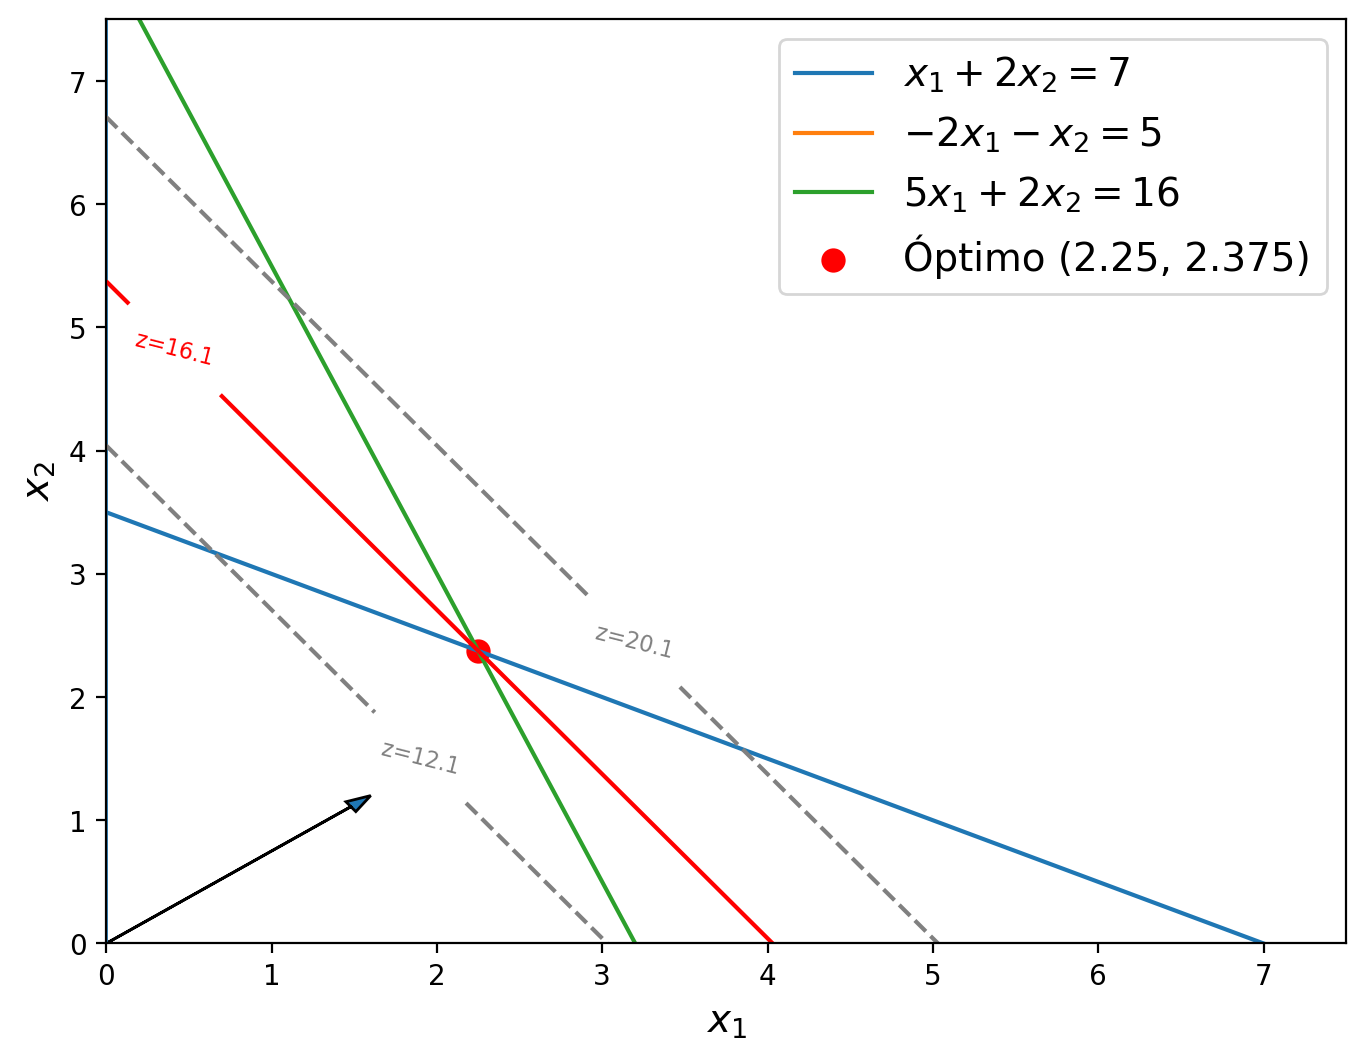

In [ ]:
# Plot 2D de restricciones, gradiente del objetivo y punto óptimo

# Definición de restricciones en forma de funciones x2 = f(x1):
# 1) x1 + 2 x2 = 7    -> x2  = (7 - x1)/2
# 2) -2 x1 - x2 = 5   -> x2  = -2*x1 - 5
# 3) 5 x1 + 2 x2 = 16 -> x2  = (16 - 5*x1)/2

x1 = np.linspace(0, 7.5, 400)

rest1 = (7 - x1) / 2.0
rest2 = -2.0 * x1 - 5.0
rest3 = (16 - 5.0 * x1) / 2.0

# # Punto óptimo 
x_opt = np.array([2.25, 2.375])

# Gradiente de z = 4 x1 + 3 x2
grad = np.array([4.0, 3.0])

plt.figure(figsize=(8, 6), dpi = 200)

# Líneas de restricciones
plt.plot(x1, rest1, label=r"$x_1 + 2 x_2 = 7$")
plt.plot(x1, rest2, label=r"$-2 x_1 - x_2 = 5$")
plt.plot(x1, rest3, label=r"$5 x_1 + 2 x_2 = 16$")

# Ejes de no negatividad (ejes coordenados)
plt.axhline(0, linewidth=1)
plt.axvline(0, linewidth=1)

# Flecha del gradiente (dirección de crecimiento de z)
scale = 0.4  # factor para hacer visible la flecha
plt.arrow(0,0, scale*grad[0], scale*grad[1],
          head_width=0.1, length_includes_head=True)

# Punto óptimo
plt.scatter([x_opt[0]], [x_opt[1]], marker="o",color='r', s=60, label="Óptimo (2.25, 2.375)")

# Curvas de nivel de la función objetivo z = 4 x1 + 3 x2 (OPCIONAL)
X1, X2 = np.meshgrid(np.linspace(0, 7.5, 200), np.linspace(0, 7.5, 200))
Z = 4*X1 + 3*X2
niveles = [4*x_opt[0] + 3*x_opt[1] - 4, 
           4*x_opt[0] + 3*x_opt[1],      
           4*x_opt[0] + 3*x_opt[1] + 4]  # Arbitrarios niveles alrededor del óptimo
CS = plt.contour(X1, X2, Z, levels=niveles, colors=['gray','red','gray'], linestyles=['--','-','--'])
plt.clabel(CS, inline=True, fontsize=8, fmt="z=%.1f")

plt.xlim(0, 7.5)
plt.ylim(0, 7.5)
plt.xlabel(r"$x_1$", fontsize=14)
plt.ylabel(r"$x_2$", fontsize=14)
plt.legend(loc="upper right", fontsize=14)
# plt.grid(True, linestyle="--", linewidth=0.5)

plt.show()
